# chapter 13 in chapter exercises

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 13.1: Visualization of confidence intervals

In [3]:
# a population and its mean
popdata = np.random.randn(100000) + 2
popmean = np.mean(popdata)

# samples and their confidence intervals
nSamples   = 20
sampleSize = 50

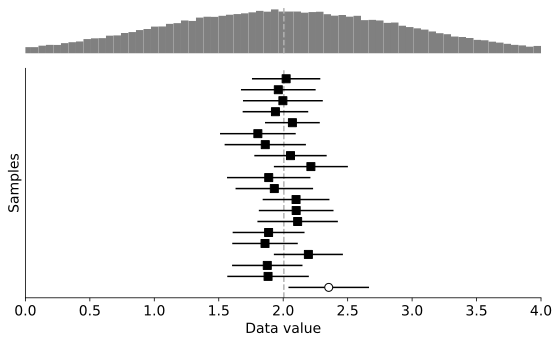

In [4]:
# setup the figure
fig = plt.figure(figsize=(8,5))
gs = plt.GridSpec(5,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1:])

# draw the population distribution and its mean
ax1.hist(popdata,bins='fd',color='gray')
ax1.axvline(x=popmean,linestyle='--',color=(.7,.7,.7))
ax2.axvline(x=popmean,linestyle='--',color=(.7,.7,.7))

# run the experiment
for i in range(nSamples):

  # draw a sample
  sample = np.random.choice(popdata,sampleSize,replace=False)

  # compute its mean and stdev
  mean = np.mean(sample)
  sem  = np.std(sample,ddof=1) / np.sqrt(sampleSize)

  # confidence interval from scipy
  CI = stats.t.interval(.95,sampleSize-1,loc=mean,scale=sem)

  # plot it
  if popmean>CI[0] and popmean<CI[1]:
    c,s = 'k','s'
  else:
    c,s = 'w','o'
  ax2.errorbar(mean,i,xerr=mean-CI[0],color='k',marker=s,markerfacecolor=c,markersize=8)



ax1.set_xlim([0,4])
ax1.axis('off')

ax2.set_ylabel('Samples')
ax2.set_yticks([])
ax2.set_xlim([0,4])
ax2.set_xlabel('Data value')

plt.tight_layout()
plt.show()